# --- SOLUTION ---

HINT: These solutions only give an impression on how the problems can be tackled. They are neither the best possible solutions nor are they always complete. You are invited to find approaches that outperform those given in the solutions and present them to your fellow students.

# Exercise 3: Time Series

This exercise is about time series analysis. To get an understanding of how to treat time series data in pandas, refer to the respective [part in the documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). Additionally, we will use [Prophet](https://facebook.github.io/prophet/) for trend analysis and prediction.

First, you need to install Prophet. Follow the instructions [here](https://facebook.github.io/prophet/docs/installation.html#installation-in-python).

## Task 1: Analysing DAX Trends

In this task, we analyse a data set consisting of DAX stock numbers starting from 1st of March, 1994 until 28th of February, 2014. In the following subtasks, we will analyse the data set and try to predict an outlook of DAX numbers. For the prediction, we use the feature `Close` as target.

- Import the data set `dax_94_14.csv`. Make sure to parse the `Date` attribute correctly and use it as index.
- Get familiar with the stock numbers by plotting the `Close` feature. Can you already see a trend?
- Build regression models using `Close` as target to visualise the trend of the data. As only feature, use `days_since_start` (i.e. days passed since the first data point). Build models using `Linear Regression`, `Neural Network`, and `SVM`.
- Now use Prophet to visualise the trend of the data set. Additionally, make and plot a prediction of the upcoming year.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

# Import the data set. For the parsing of dates, the 'read_csv'-function has some helpful parameters.

# --- SOLUTION ---

dateparse = lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p')
df = pd.read_csv('dax_94_14.csv', sep=';', parse_dates=['Date'], date_parser=dateparse, index_col='Date')
df.head()

# Alternative:
#df = pd.read_csv('dax_94_14.csv', sep=';', parse_dates=['Date'], index_col='Date', infer_datetime_format=True)
#df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-02-28,9592.90,9692.08,9566.04,9692.08,83200800.0,9692.08
2014-02-27,9660.55,9672.82,9497.78,9588.33,86422200.0,9588.33
2014-02-26,9708.50,9720.66,9612.52,9661.73,87277200.0,9661.73
2014-02-25,9676.56,9710.95,9628.72,9699.35,90676100.0,9699.35
2014-02-24,9619.64,9708.94,9602.95,9708.94,67953500.0,9708.94


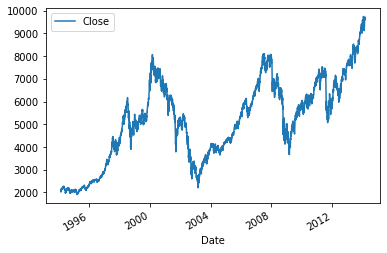

In [4]:
# Inspect the data set by plotting the 'Close' feature. Can you see a trend?

# --- SOLUTION ---

df_close = df[['Close']]
df_close.plot()
plt.show()

Conclusion: It is already possible to see an upward trend in the data set.

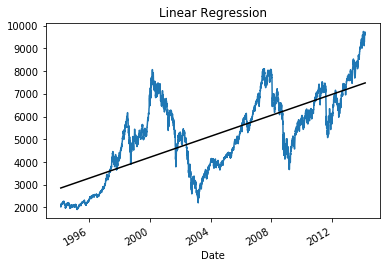

/Users/nheist/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


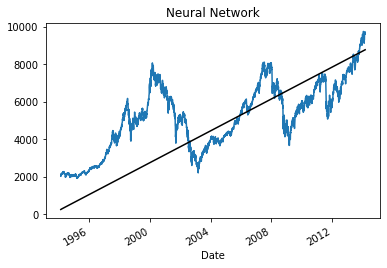

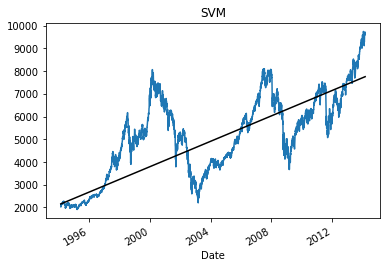

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# Build models that reflect the trend in the data. Use 'days_passed' as only feature.
# Which model reflects the trend most appropriately?

# --- SOLUTION ---

df_close = df_close.assign(days=(df.index - df.index.min()).days)
X, y = df_close.drop(columns='Close'), df_close['Close']

def plot_prediction(X, y, y_pred, title=None):
    y.plot()
    plt.plot(X.index, y_pred, color='k')
    plt.title(title or '')
    plt.show()

# Linear Regression
estimator = LinearRegression().fit(X, y)
plot_prediction(X, y, estimator.predict(X), title='Linear Regression')

# Neural Net
estimator = MLPRegressor().fit(X, y)
plot_prediction(X, y, estimator.predict(X), title='Neural Network')

# SVM
estimator = SVR(gamma='scale', kernel='linear').fit(X, y)
plot_prediction(X, y, estimator.predict(X), title='SVM')

Conclusion: Linear Regression and SVM create the most appropriate trends.

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


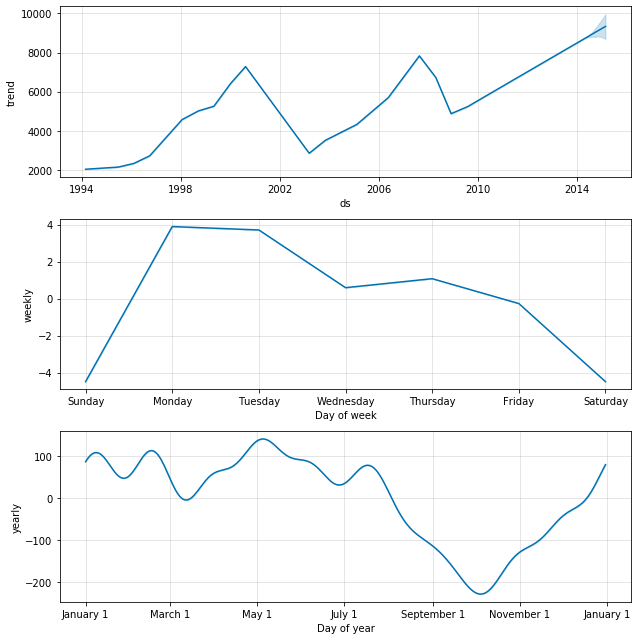

In [6]:
# Use Prophet to visualise the trend of the data set. Additionally, make and plot a prediction for the following year.
# Prophet Quick-Start-Guide: https://facebook.github.io/prophet/docs/quick_start.html

# --- SOLUTION ---

df_prophet = df.reset_index().rename(index=str, columns={'Date': 'ds', 'Close': 'y'})
m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot_components(forecast)
plt.show()

Conclusion: Prophet is a very powerful tool that can be used with only a couple of lines of code. The automatic generation of yearly/weekly/daily analyses is very convenient.